In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.gridspec as grid_spec

In [2]:
df = pd.read_csv(
    "/Users/dickinsonjo/repos/CollegePriceTransparency/data/InstitutionData2020-2021.csv"
)
df.head(3)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_6381/1763566676.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   

                                              NPCURL  ...  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1  https://tcc.ruffalonl.com/University of Alabam...  ...   
2           https://www2.amridgeuniversity.edu:9091/  ...   

   BBRR4_PP_MALE_DISCHARGE  BBRR4_PP_NOMALE_N  BBRR4_PP_NOMALE_DFLT  \
0                0.05-0.09                429             0.15-0.19   
1                   <=0.10                402                <=0.10   
2        PrivacySuppressed  PrivacySuppressed     PrivacySuppressed   

   BBRR4_PP_NOMALE_DLNQ  BBRR4_PP_NOMALE_FBR  BBRR4_PP_NOMALE_DFR  \
0                <=0.05            0.50-0.54            0.10-0.14   
1                <=0.10            0.40-0.49            0.10-0.19   
2     PrivacySuppressed    PrivacySuppressed    PrivacySuppressed   

   BBRR4_PP_NOMALE_NOPROG  BBRR4_PP_NOMALE_MAKEPROG  \
0                  <=0.05                    <=0.05   
1                  <=0.10                    <=0.10   
2       PrivacySuppressed         PrivacySuppressed   

   BBRR4_PP_NOMALE_PAIDINFULL  BBRR4_PP_NOMALE_DISCHARGE  
0                      <=0.05                  0.05-0.09  
1                   0.10-0.19                     <=0.10  
2           PrivacySuppressed          PrivacySuppressed  

[3 rows x 3214 columns]

# Columns for analysis

1. UNITID
2. INSTNM
3. CITY
4. STABBR
5. ZIP
6. SCH_DEG
7. PREDDEG
8. HIGHDEG
9. CONTROL
10. REGION
11. COSTT4_A
12. TUITION_IN
13. NPT4_PUB & NPT4_PRIV
14. TUITFTE
15. INEXPFTE
16. AVGFACSAL
17. LOCALE
18. LOCALE2

In [3]:
df_cleaned = df[
    [
        "UNITID",
        "INSTNM",
        "CITY",
        "STABBR",
        "ZIP",
        "PREDDEG",
        "HIGHDEG",
        "CONTROL",
        "REGION",
        "GRAD_DEBT_MDN",
        "COSTT4_A",
        "TUITIONFEE_IN",
        "TUITIONFEE_OUT",
        "TUITFTE",
        "INEXPFTE",
        "AVGFACSAL",
        "LOCALE",
    ]
]

In [4]:
df_cleaned.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
PREDDEG              0
HIGHDEG              0
CONTROL              0
REGION               0
GRAD_DEBT_MDN      159
COSTT4_A          3240
TUITIONFEE_IN     2756
TUITIONFEE_OUT    2756
TUITFTE            519
INEXPFTE           519
AVGFACSAL         2643
LOCALE             497
dtype: int64

In [5]:
total = df_cleaned.shape[0]
total

6543

In [6]:
df_cleaned.isna().sum() / total * 100

UNITID             0.000000
INSTNM             0.000000
CITY               0.000000
STABBR             0.000000
ZIP                0.000000
PREDDEG            0.000000
HIGHDEG            0.000000
CONTROL            0.000000
REGION             0.000000
GRAD_DEBT_MDN      2.430078
COSTT4_A          49.518569
TUITIONFEE_IN     42.121351
TUITIONFEE_OUT    42.121351
TUITFTE            7.932141
INEXPFTE           7.932141
AVGFACSAL         40.394315
LOCALE             7.595904
dtype: float64

In [7]:
df_cleaned.query("REGION == 0")

UNITID                                             INSTNM  \
368   119678                          Naval Postgraduate School   
535   128328                    United States Air Force Academy   
582   130624                  United States Coast Guard Academy   
1381  164155                        United States Naval Academy   
2265  197027              United States Merchant Marine Academy   
2266  197036                     United States Military Academy   
2428  200697  Air Force Institute of Technology-Graduate Sch...   

                      CITY STABBR         ZIP  PREDDEG  HIGHDEG  CONTROL  \
368               Monterey     CA       93943        4        4        1   
535           USAF Academy     CO  80840-5002        3        3        1   
582             New London     CT  06320-4195        3        3        1   
1381             Annapolis     MD  21402-1300        3        3        1   
2265           Kings Point     NY  11024-1634        3        4        1   
2266           West  Point     NY       10996        3        3        1   
2428  Wright-Patterson AFB     OH  45433-7765        4        4        1   

      REGION GRAD_DEBT_MDN  COSTT4_A  TUITIONFEE_IN  TUITIONFEE_OUT  TUITFTE  \
368        0           NaN       NaN            NaN             NaN      NaN   
535        0           NaN       NaN            NaN             NaN      0.0   
582        0           NaN       NaN            NaN             NaN      0.0   
1381       0           NaN       NaN            NaN             NaN      0.0   
2265       0          8833    9715.0          780.0           780.0      0.0   
2266       0           NaN       NaN            NaN             NaN      0.0   
2428       0           NaN       NaN            NaN             NaN      NaN   

      INEXPFTE  AVGFACSAL  LOCALE  
368        NaN    14550.0    22.0  
535    30931.0    10484.0    31.0  
582     9027.0    11487.0    13.0  
1381   46336.0    12817.0    21.0  
2265    8736.0    10798.0    21.0  
2266   42436.0    10525.0    31.0  
2428       NaN        NaN    21.0

In [8]:
finance_df = df_cleaned[[
    "UNITID",
    "COSTT4_A",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "TUITFTE",
    "INEXPFTE",
    "AVGFACSAL",
    "GRAD_DEBT_MDN"
]]

Algorithm:

1. Remove all null values
2. Create random null values proportional to full dataset
3. Impute random null values with
- BayesRidgeRegression
- Linear Regression
- K Nearest Neighbor
- Random Forest Regression

4. Evaluate imputation with:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

5. Generate Figures:
- Boxplot
- Histogram
- Scatterplot

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
test_df = finance_df.copy()
test_df.loc[test_df['GRAD_DEBT_MDN'] == 'PrivacySuppressed','GRAD_DEBT_MDN'] = np.nan
# test_df[test_df["GRAD_DEBT_MDN"].apply(lambda x: isinstance(x, str))]
test_df.GRAD_DEBT_MDN = pd.to_numeric(test_df.GRAD_DEBT_MDN)

In [11]:
test_df.rename(columns={
    "COSTT4_A": "cost_of_attendance",
    "TUITIONFEE_IN": "in_state_tuition",
    "TUITIONFEE_OUT": "out_of_state_tuition",
    "TUITFTE": "tuition_per_fte",
    "INEXPFTE": "instructional_expenditure_per_fte",
    "AVGFACSAL": "avg_faculty_salary",
    "GRAD_DEBT_MDN": "median_grad_debt"
},
inplace=True)

In [12]:
test_df.head()

UNITID  cost_of_attendance  in_state_tuition  out_of_state_tuition  \
0  100654             21924.0           10024.0               18634.0   
1  100663             26248.0            8568.0               20400.0   
2  100690                 NaN               NaN                   NaN   
3  100706             24869.0           11488.0               23884.0   
4  100724             21938.0           11068.0               19396.0   

   tuition_per_fte  instructional_expenditure_per_fte  avg_faculty_salary  \
0           9243.0                             7699.0              8779.0   
1          11678.0                            14264.0             11590.0   
2          14093.0                             4381.0              4672.0   
3           8246.0                             8156.0              9820.0   
4           8535.0                             9459.0              7701.0   

   median_grad_debt  
0           31000.0  
1           22300.0  
2           32189.0  
3           20705.0  
4           31000.0

In [13]:
test_df.dtypes

UNITID                                 int64
cost_of_attendance                   float64
in_state_tuition                     float64
out_of_state_tuition                 float64
tuition_per_fte                      float64
instructional_expenditure_per_fte    float64
avg_faculty_salary                   float64
median_grad_debt                     float64
dtype: object

In [14]:
test_df.describe()

UNITID  cost_of_attendance  in_state_tuition  \
count  6.543000e+03         3303.000000       3787.000000   
mean   2.346034e+06        28311.943990      16254.410351   
std    8.159248e+06        16897.954029      14464.919239   
min    1.006540e+05         4607.000000        480.000000   
25%    1.741315e+05        14673.500000       5400.000000   
50%    2.293370e+05        23170.000000      11366.000000   
75%    4.572395e+05        37743.500000      21607.500000   
max    4.966450e+07        81531.000000      66064.000000   

       out_of_state_tuition  tuition_per_fte  \
count           3787.000000      6024.000000   
mean           19527.170320     10902.551461   
std            13496.483076      8946.779713   
min              480.000000         0.000000   
25%             9091.000000      4884.250000   
50%            15369.000000      9435.500000   
75%            26190.000000     14253.750000   
max            66064.000000    191794.000000   

       instructional_expenditure_per_fte  avg_faculty_salary  median_grad_debt  
count                        6024.000000         3900.000000       5029.000000  
mean                         8759.862716         7209.567436      15919.558958  
std                         13306.209710         2643.435191       7889.449033  
min                             0.000000          410.000000       2716.000000  
25%                          3854.500000         5490.750000       9500.000000  
50%                          6377.500000         6898.000000      13500.000000  
75%                          9894.500000         8593.250000      22750.000000  
max                        598759.000000        21720.000000      43021.000000

In [15]:
# Log transform
test_df.iloc[:, 1:] = test_df.iloc[:, 1:].replace(0, 1)  # Replace zeros with a 1
test_df.iloc[:, 1:] = test_df.iloc[:, 1:].apply(np.log)

In [16]:
columns_to_impute = test_df.columns[1:]

# Get proporition of nulls
nulls = test_df.isna().sum()[1:]
proportion_of_nulls = round(nulls / len(test_df), 3)
proportion_list = list(proportion_of_nulls)

# Convert to dictionary
proportion_dict = dict(zip(columns_to_impute, proportion_list))

In [17]:
proportion_dict

{'cost_of_attendance': 0.495,
 'in_state_tuition': 0.421,
 'out_of_state_tuition': 0.421,
 'tuition_per_fte': 0.079,
 'instructional_expenditure_per_fte': 0.079,
 'avg_faculty_salary': 0.404,
 'median_grad_debt': 0.231}

In [18]:
# Remove all nulls
test_df_clean = test_df[columns_to_impute].dropna(how="any").reset_index(drop=True)
test_df_to_impute = test_df_clean.copy()

for key in proportion_dict.keys():
    # get number of nulls
    num_null = int(len(test_df_to_impute) * proportion_dict[key])

    # randomly select indices
    null_indices = np.random.choice(test_df_to_impute.index, num_null, replace=False)

    # assign null vals to that column
    test_df_to_impute.loc[null_indices, key] = np.nan



In [19]:
# imputer = IterativeImputer(random_state=45)

ridge_error_dict = {}
linear_error_dict = {}
rf_error_dict = {}
knn_error_dict = {}

error_dicts = [
    ridge_error_dict,
    linear_error_dict,
    rf_error_dict,
    knn_error_dict
    ]

impute_techniques = [
    ["bayesian_ridge_regression", IterativeImputer(random_state=45)], 
    ["linear_regression", IterativeImputer(estimator=LinearRegression(), random_state=45)],
    ["random_forest", IterativeImputer(estimator=RandomForestRegressor(), random_state=45)],
    ["knn", KNNImputer()]
    ]
residuals_df = pd.DataFrame()

for i, impute in enumerate(impute_techniques):
    imputed_test_df = impute[1].fit_transform(test_df_to_impute)
    imputed_test_df = pd.DataFrame(imputed_test_df, columns=columns_to_impute)

    # mask = pd.DataFrame()

    for col in columns_to_impute:
        null_col = test_df_to_impute[col]
        null_data_index = null_col[null_col.isnull()].index

        imputed_data = imputed_test_df.loc[null_data_index]
        imputed_data_col = imputed_data[col]

        true_value_df = test_df_clean.loc[null_data_index]
        true_value_col = true_value_df[col]

        mae = metrics.mean_absolute_error(true_value_col.apply(np.exp), imputed_data_col.apply(np.exp))
        mse = metrics.mean_squared_error(true_value_col.apply(np.exp), imputed_data_col.apply(np.exp))
        rmse = np.sqrt(mse)
        error_dicts[i][col] = [mae, mse, rmse]

        true_value_col = true_value_col.to_frame()
        true_value_col['predicted_value'] = imputed_data_col
        true_value_col = true_value_col.apply(pd.to_numeric)
        true_value_col['residuals'] = true_value_col[col] - true_value_col["predicted_value"]
        true_value_col["data_column"] = f"{col}"
        true_value_col["impute_technique"] = f"{impute[0]}"

        true_value_col.columns = ["true_value", "predicted_value", "residuals", "data_column", "impute_technique"]

        residuals_df = pd.concat([residuals_df, true_value_col])


/Users/dickinsonjo/miniconda3/envs/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/dickinsonjo/miniconda3/envs/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/dickinsonjo/miniconda3/envs/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## BayesianRidgeRegression

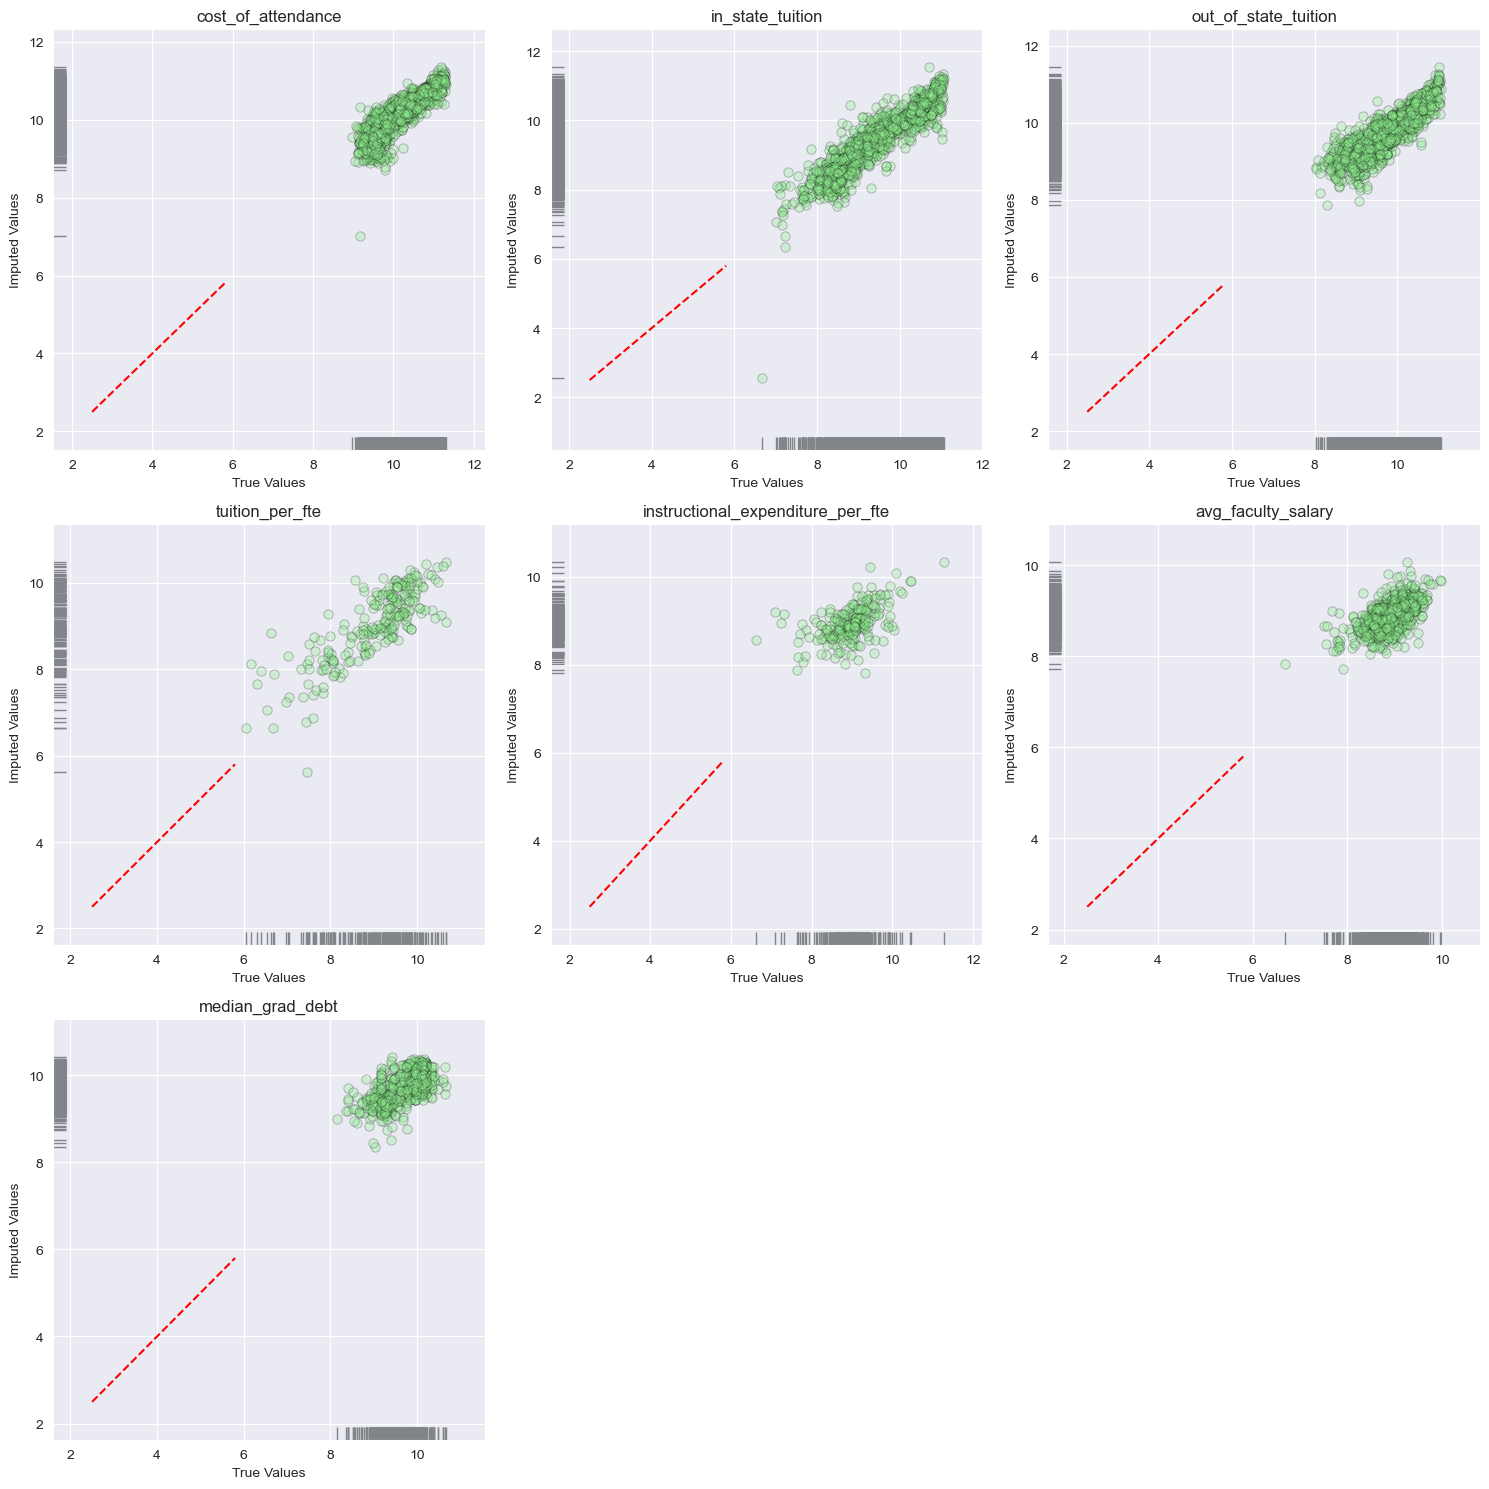

In [20]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

legends = []

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'bayesian_ridge_regression'")

    sns.scatterplot(
        ax=axs[idx],
        data=mask,
        x="true_value",
        y="predicted_value",
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    # Rug plot on the x-axis (true_value)
    sns.rugplot(
        ax=axs[idx],
        x=mask["true_value"],
        y=mask["predicted_value"],
        height=0.03,
        color='#818589'
    )
    
    axs[idx].set_title(col)
    axs[idx].set_xlabel("True Values")
    axs[idx].set_ylabel("Imputed Values")
    # axs[idx].set_xlim([2.5, 5.8])
    # axs[idx].set_ylim([2.5, 5.8])

    axs[idx].plot(
        [2.5, 5.8], 
        [2.5, 5.8], 
        color='red', 
        linestyle='--'
        )
    

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

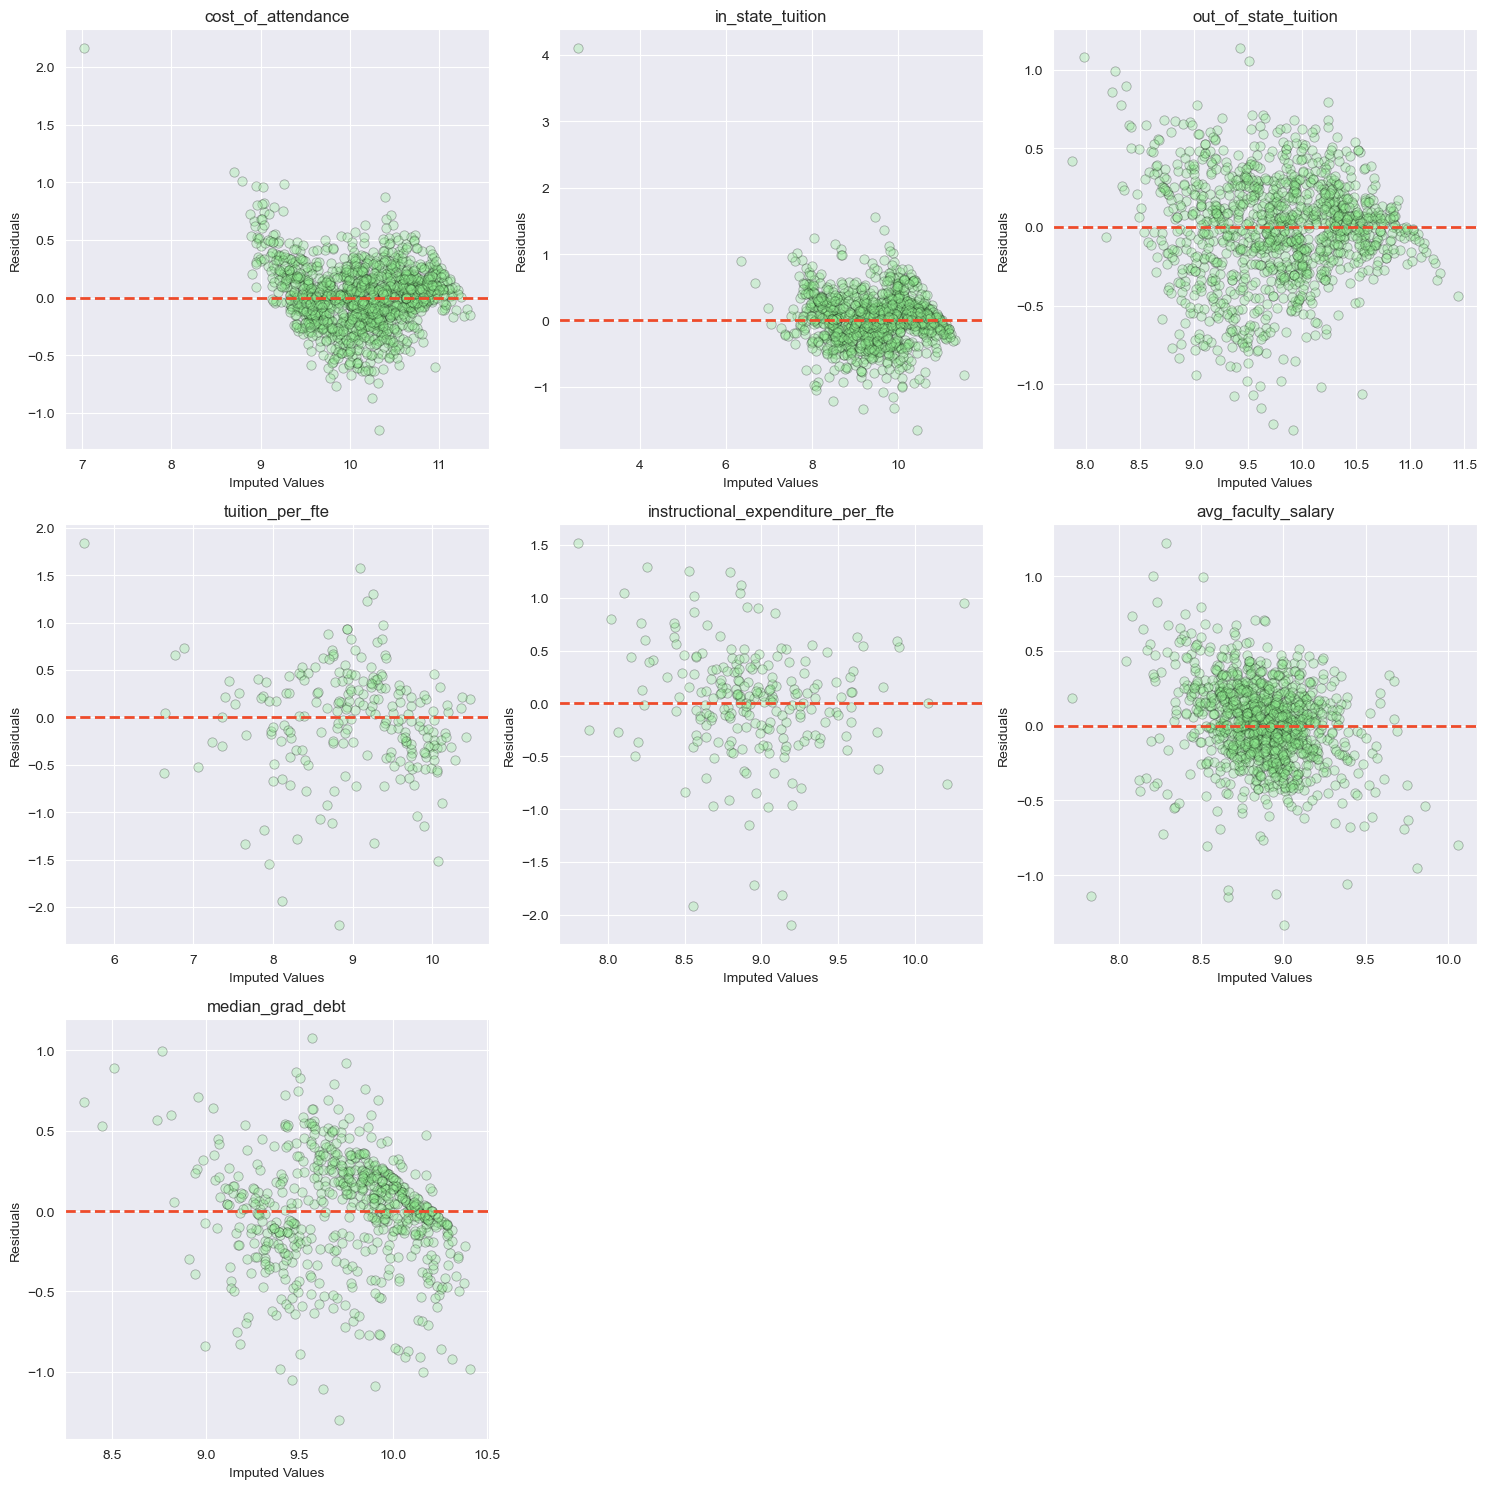

In [21]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'bayesian_ridge_regression'")

    sns.scatterplot(
        ax=axs[idx], 
        data=mask, 
        x="predicted_value", 
        y="residuals", 
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    axs[idx].axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

    axs[idx].set_title(col)
    axs[idx].set_xlabel("Imputed Values")
    axs[idx].set_ylabel("Residuals")

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

## Linear Regression

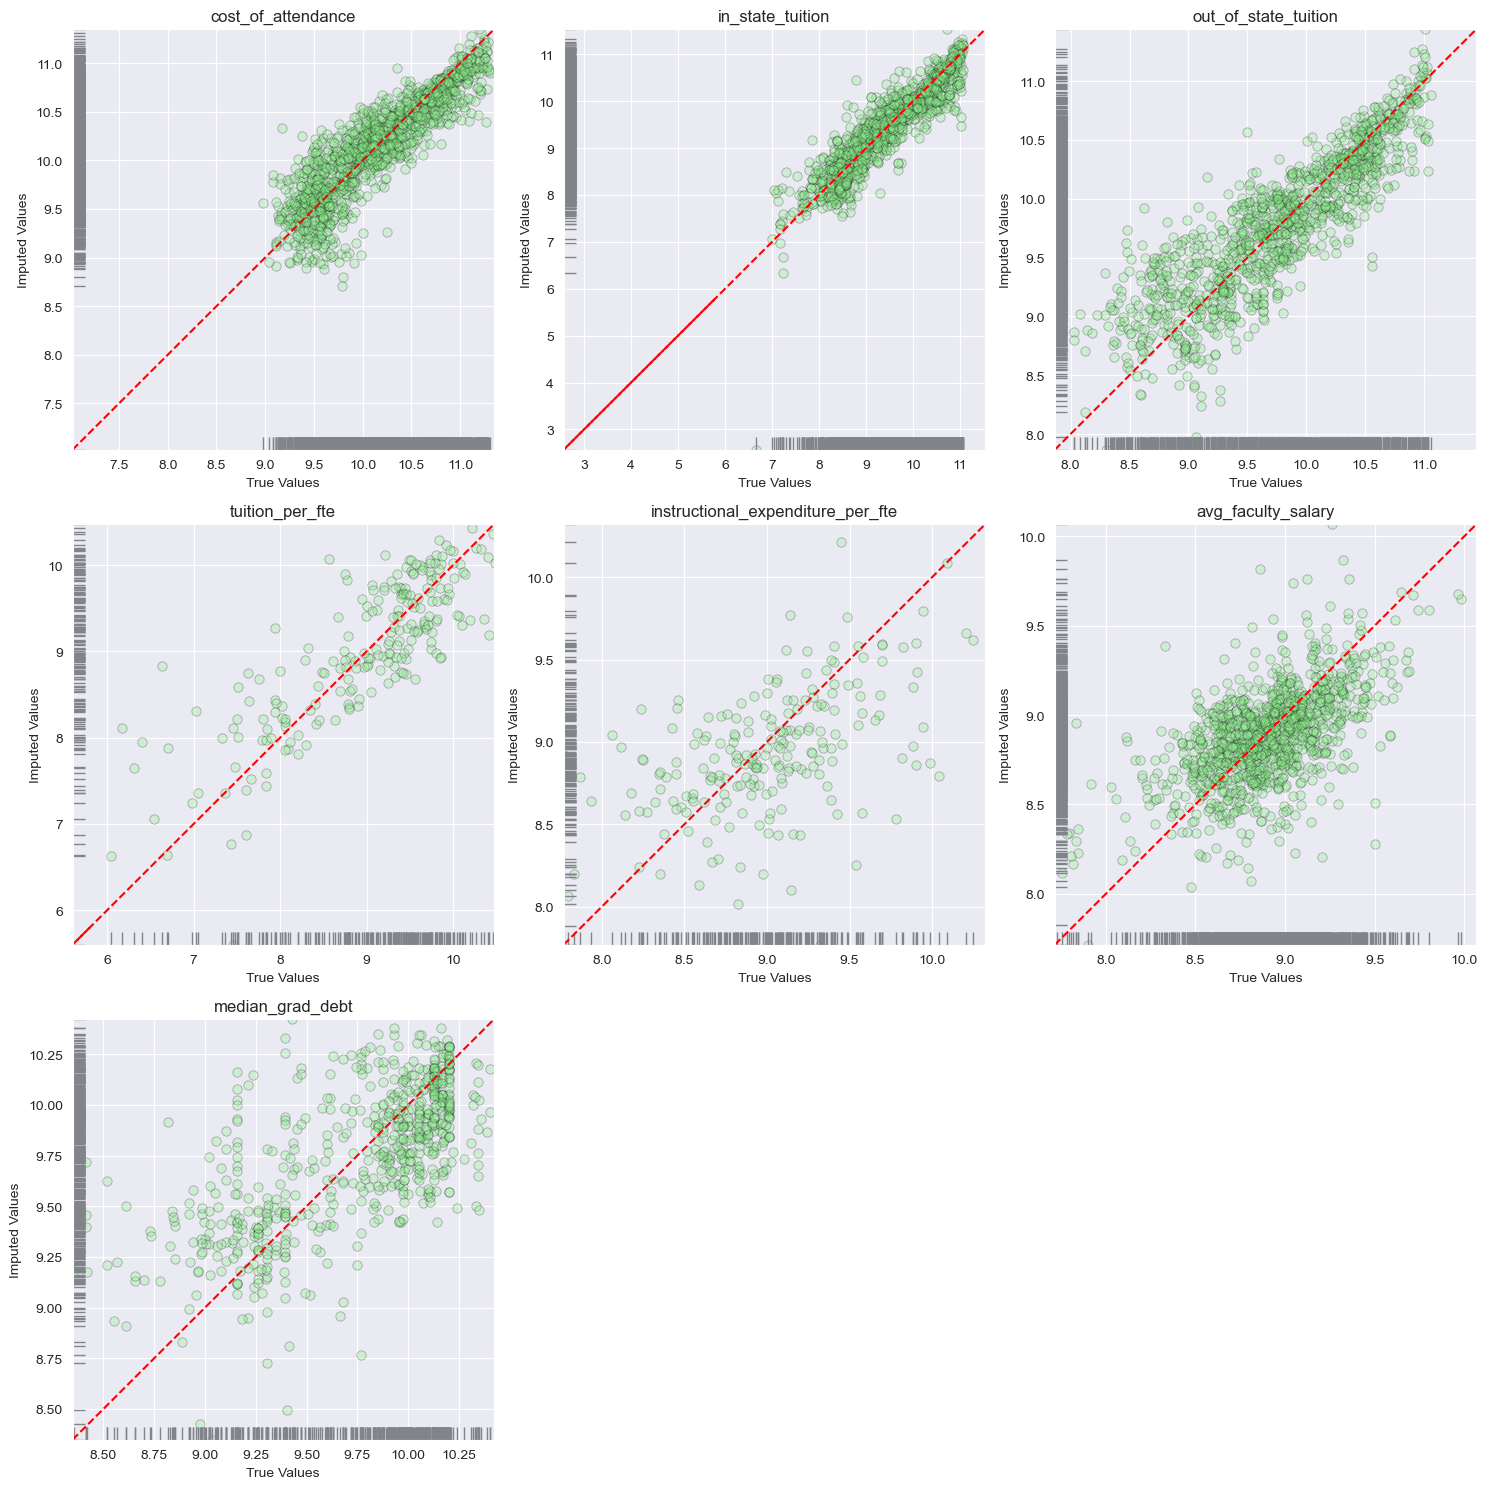

In [22]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

legends = []

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'linear_regression'")

    sns.scatterplot(
        ax=axs[idx],
        data=mask,
        x="true_value",
        y="predicted_value",
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    # Rug plot on the x-axis (true_value)
    sns.rugplot(
        ax=axs[idx],
        x=mask["true_value"],
        y=mask["predicted_value"],
        height=0.03,
        color='#818589'
    )
    
    axs[idx].set_title(col)
    axs[idx].set_xlabel("True Values")
    axs[idx].set_ylabel("Imputed Values")
    axs[idx].set_xlim([mask["predicted_value"].min(), mask["predicted_value"].max()])
    axs[idx].set_ylim([mask["predicted_value"].min(), mask["predicted_value"].max()])

    axs[idx].plot(
        [2.5, 5.8], 
        [2.5, 5.8], 
        color='red', 
        linestyle='--'
        )
    
    axs[idx].plot(
        [mask["predicted_value"].min(), mask["predicted_value"].max()], 
        [mask["predicted_value"].min(), mask["predicted_value"].max()], 
        color='red', 
        linestyle='--'
        )    

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

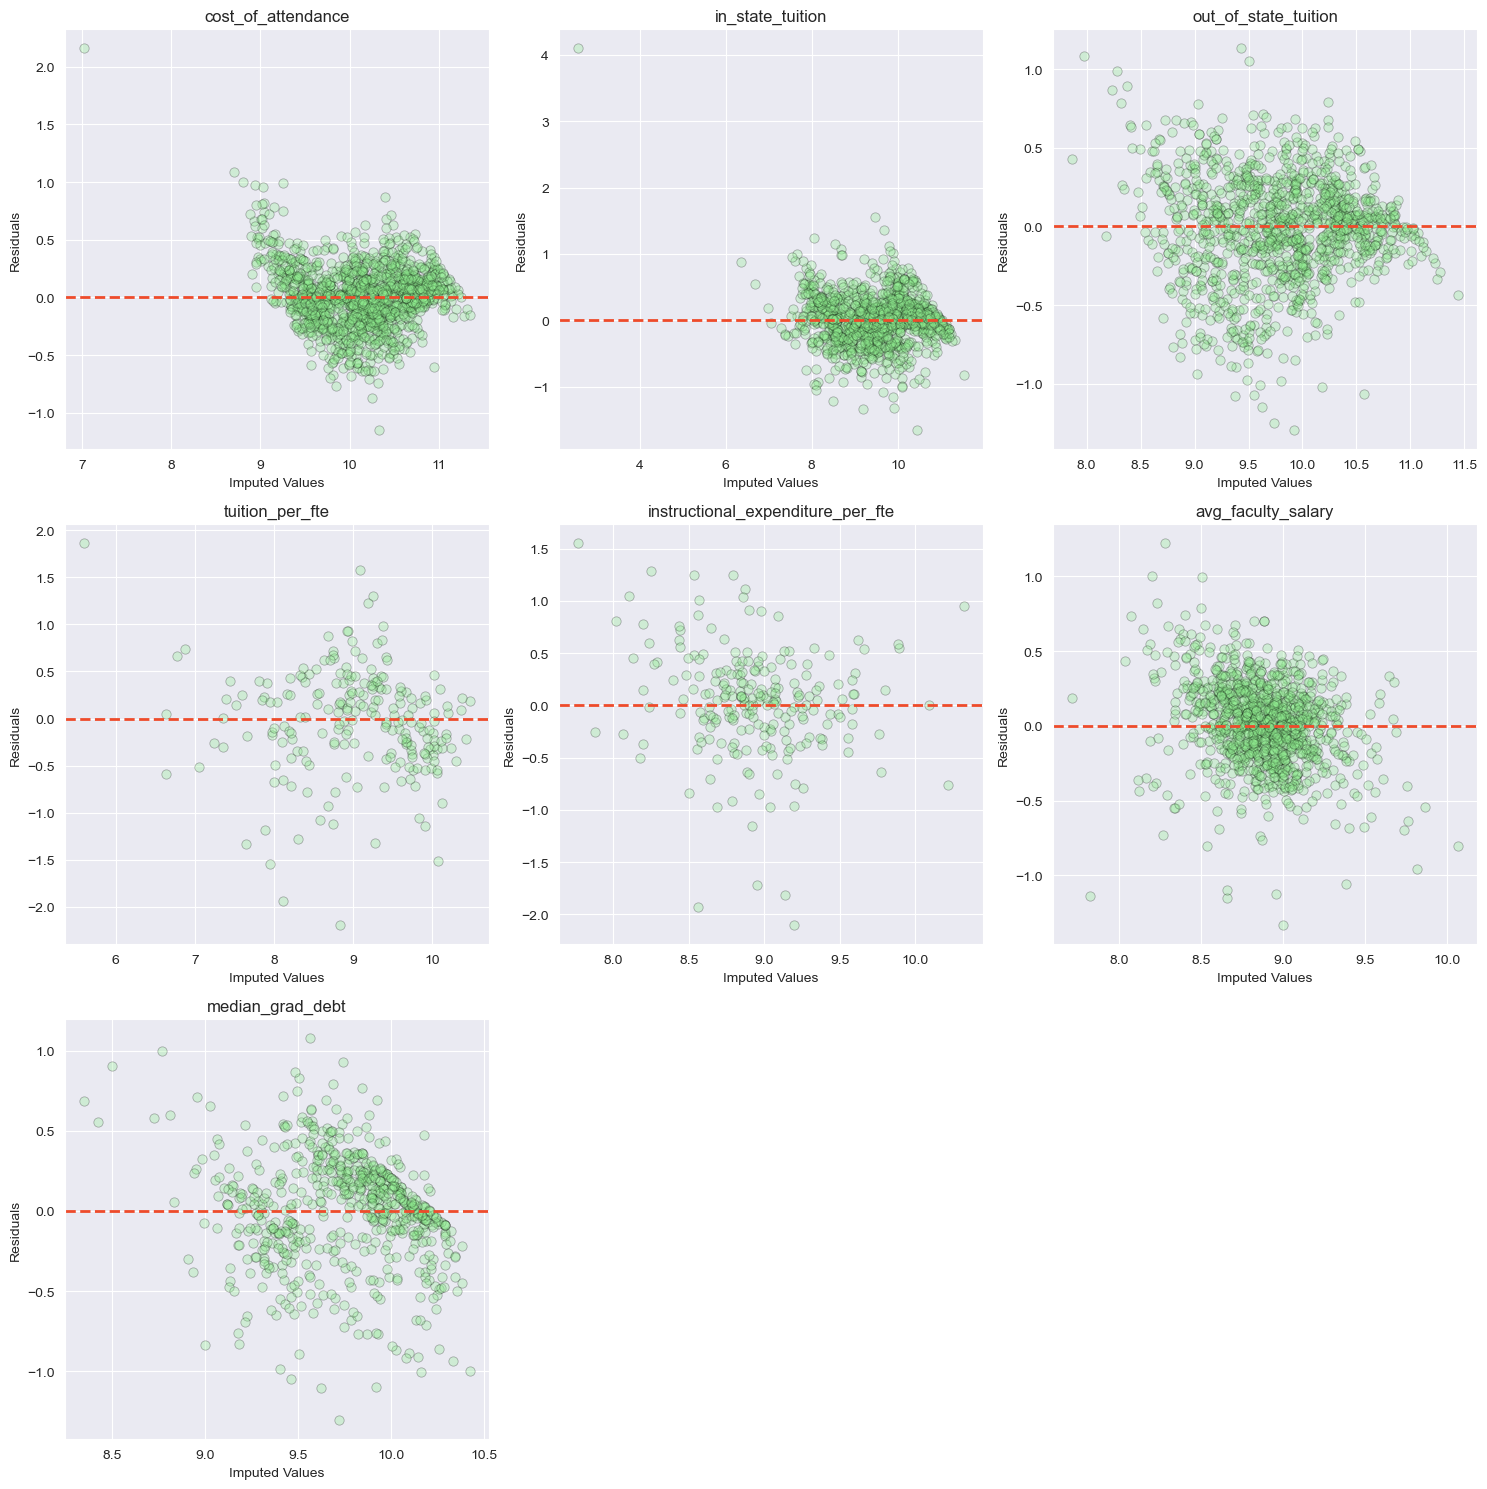

In [23]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'linear_regression'")

    sns.scatterplot(
        ax=axs[idx], 
        data=mask, 
        x="predicted_value", 
        y="residuals", 
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    axs[idx].axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

    axs[idx].set_title(col)
    axs[idx].set_xlabel("Imputed Values")
    axs[idx].set_ylabel("Residuals")

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

## RandomForestRegression

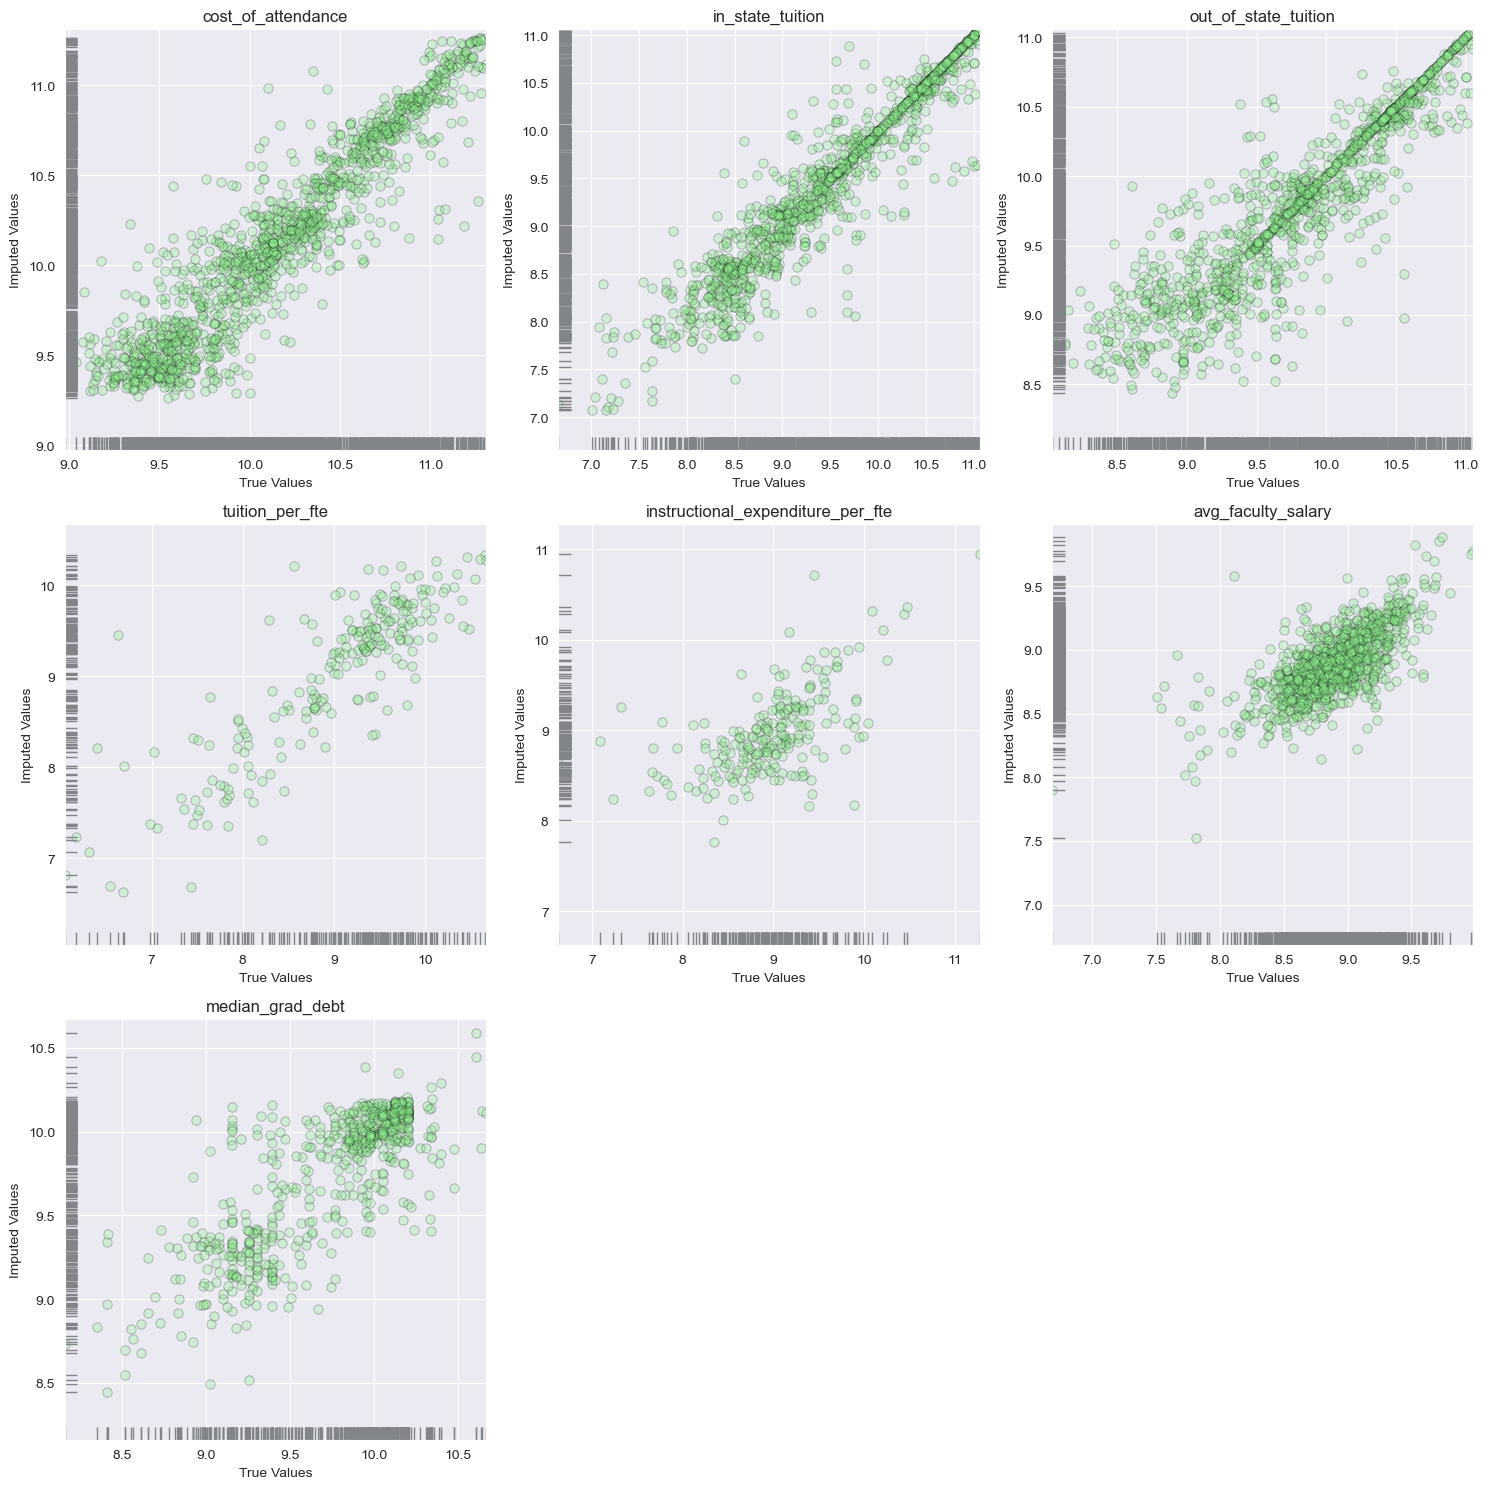

In [24]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

legends = []

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'random_forest'")

    sns.scatterplot(
        ax=axs[idx],
        data=mask,
        x="true_value",
        y="predicted_value",
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    # Rug plot on the x-axis (true_value)
    sns.rugplot(
        ax=axs[idx],
        x=mask["true_value"],
        y=mask["predicted_value"],
        height=0.03,
        color='#818589'
    )
    
    axs[idx].set_title(col)
    axs[idx].set_xlabel("True Values")
    axs[idx].set_ylabel("Imputed Values")
    axs[idx].set_xlim([mask["true_value"].min(), mask["true_value"].max()])
    axs[idx].set_ylim([mask["true_value"].min(), mask["true_value"].max()])

    axs[idx].plot(
        [2.5, 5.3], 
        [2.5, 5.3], 
        color='red', 
        linestyle='--'
        )
    

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

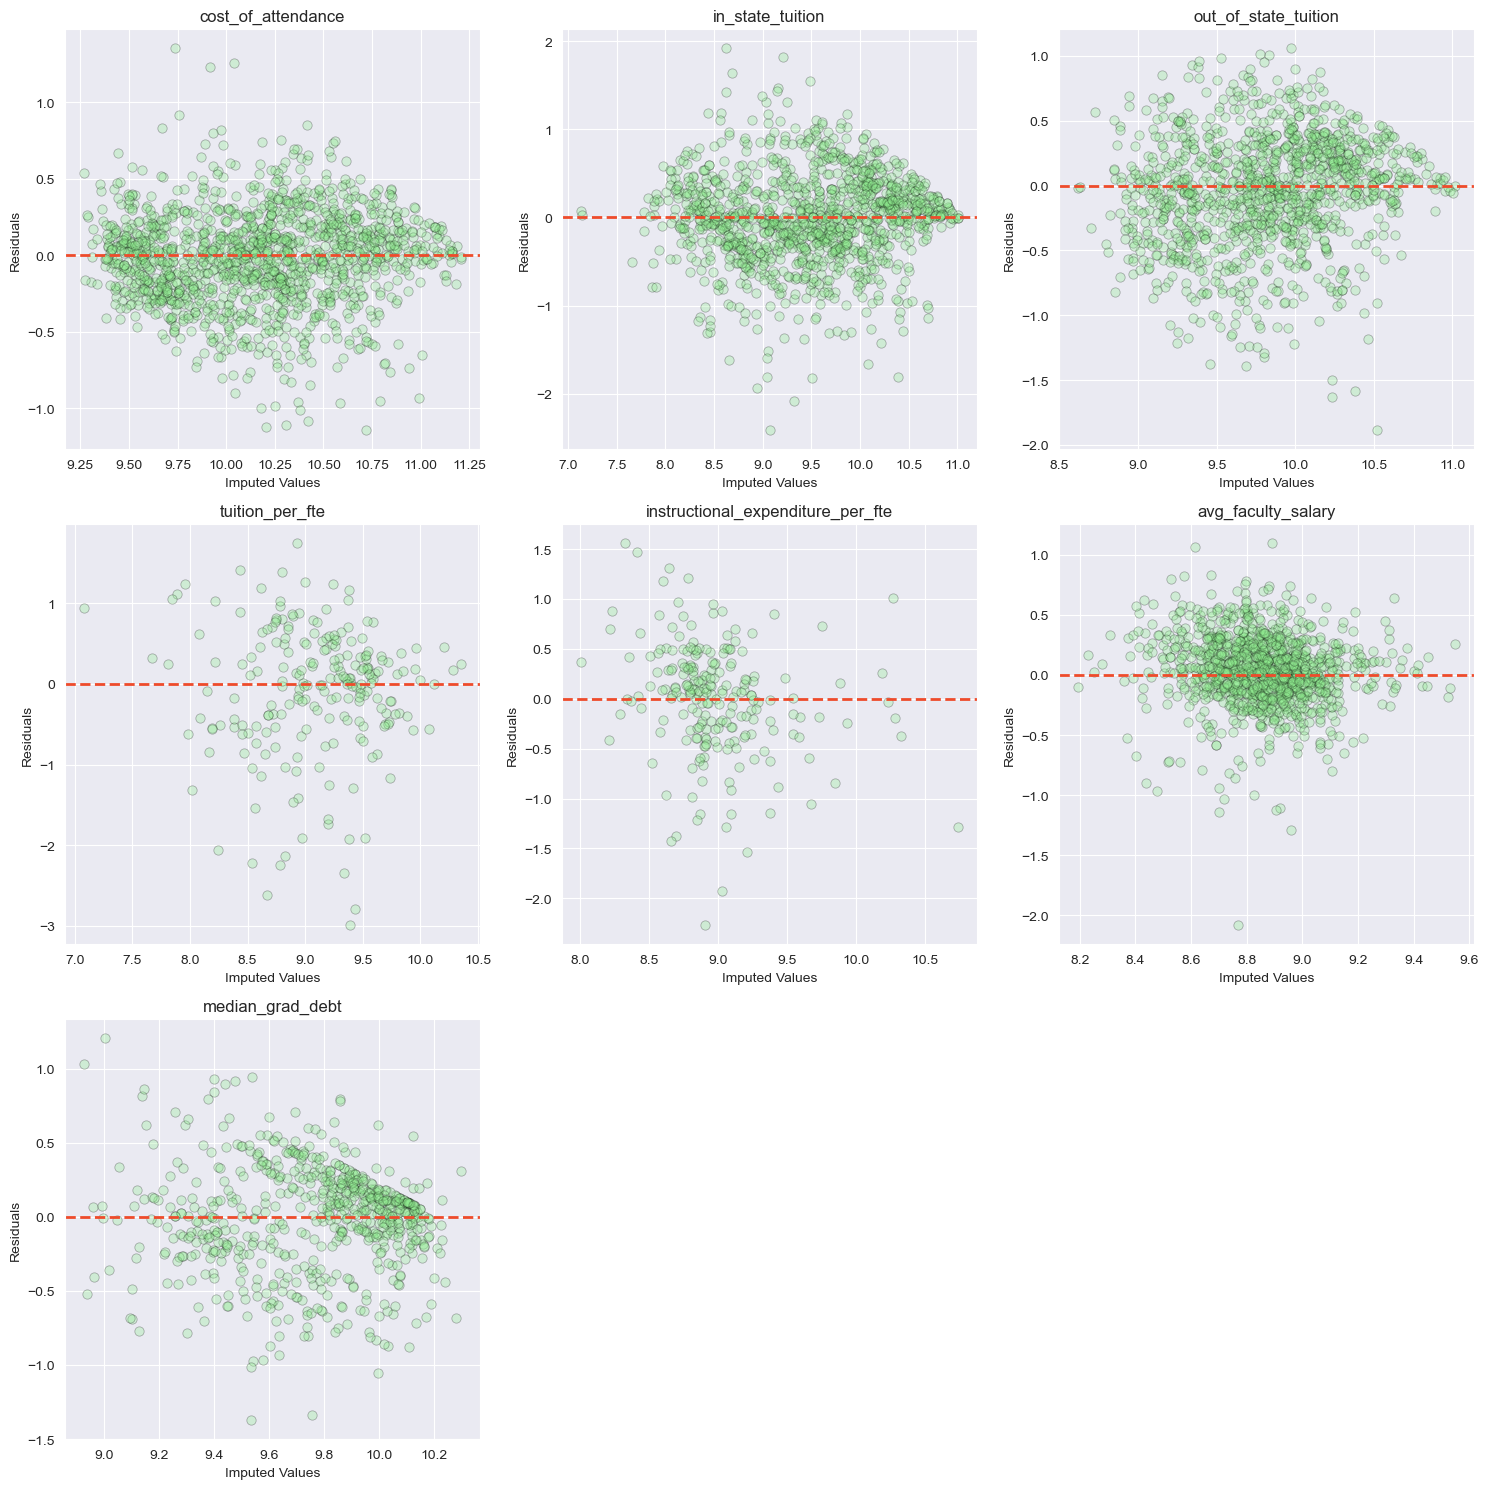

In [25]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'knn'")

    sns.scatterplot(
        ax=axs[idx], 
        data=mask, 
        x="predicted_value", 
        y="residuals", 
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    axs[idx].axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

    axs[idx].set_title(col)
    axs[idx].set_xlabel("Imputed Values")
    axs[idx].set_ylabel("Residuals")

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

## KNN Regression

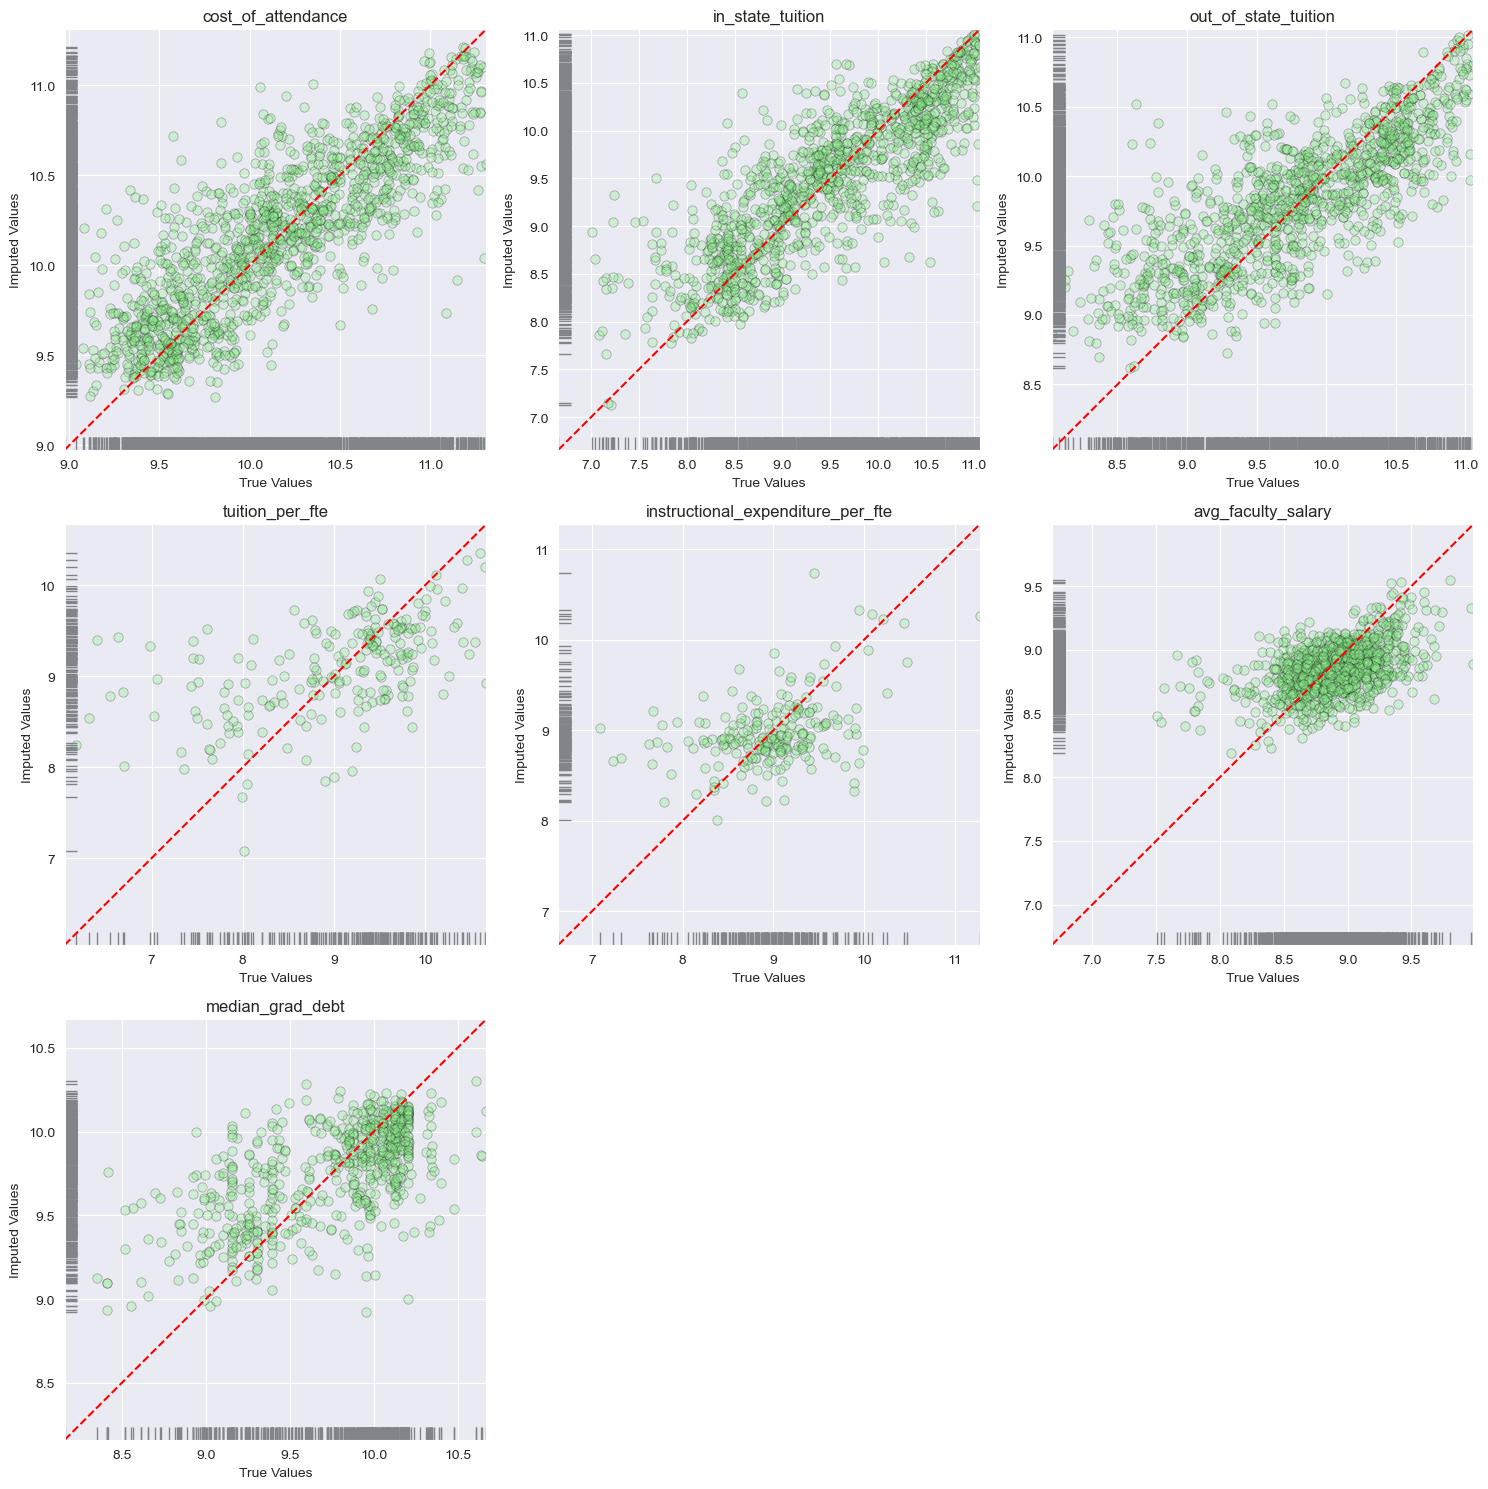

In [26]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

legends = []

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'knn'")

    sns.scatterplot(
        ax=axs[idx],
        data=mask,
        x="true_value",
        y="predicted_value",
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    # Rug plot on the x-axis (true_value)
    sns.rugplot(
        ax=axs[idx],
        x=mask["true_value"],
        y=mask["predicted_value"],
        height=0.03,
        color='#818589'
    )
    
    axs[idx].set_title(col)
    axs[idx].set_xlabel("True Values")
    axs[idx].set_ylabel("Imputed Values")
    axs[idx].set_xlim([mask["true_value"].min(), mask["true_value"].max()])
    axs[idx].set_ylim([mask["true_value"].min(), mask["true_value"].max()])

    axs[idx].plot(
        [mask["true_value"].min(), mask["true_value"].max()], 
        [mask["true_value"].min(), mask["true_value"].max()], 
        color='red', 
        linestyle='--'
        )
    

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

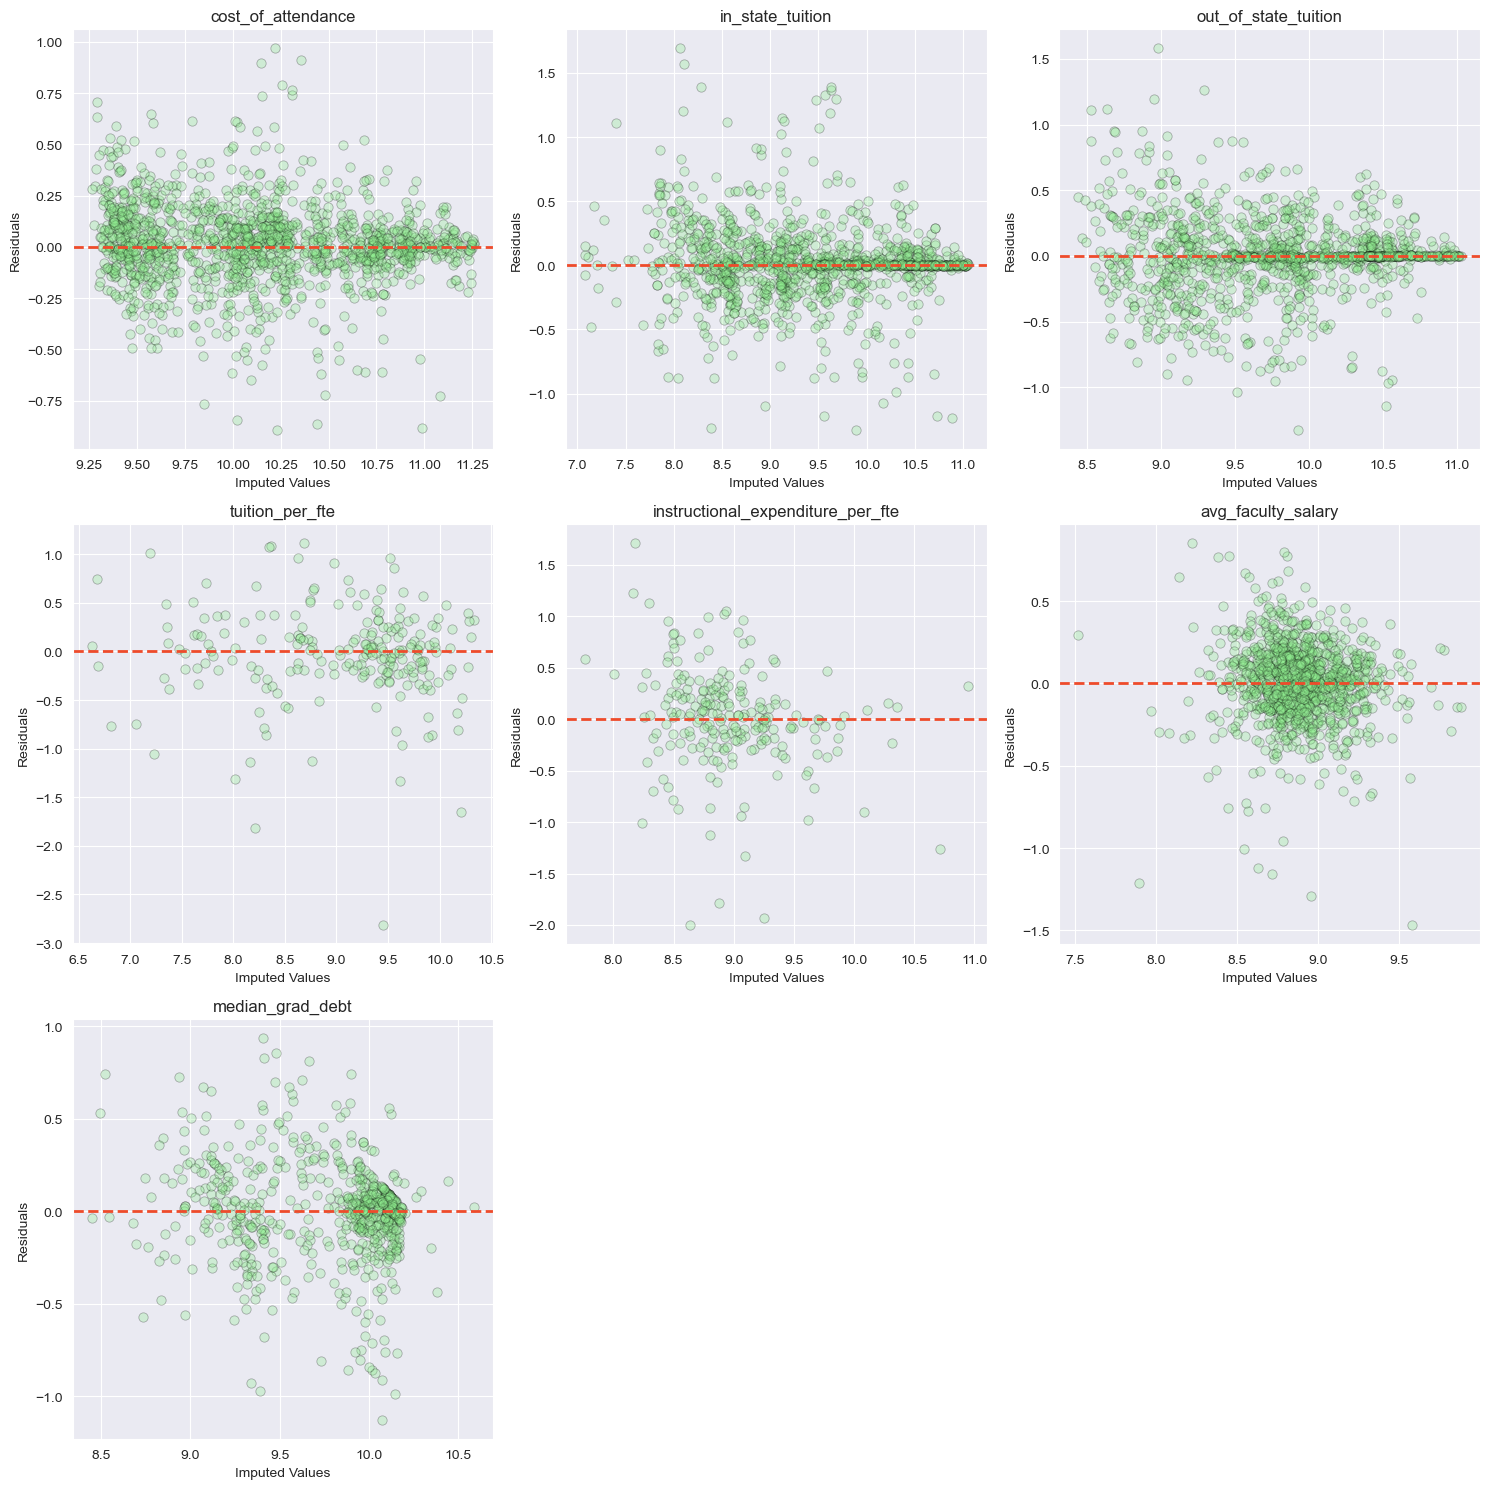

In [27]:
# Determine number of rows and columns for the grid
sns.set_style("darkgrid")

n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):

    mask = residuals_df.query("data_column == @col and impute_technique == 'random_forest'")

    sns.scatterplot(
        ax=axs[idx], 
        data=mask, 
        x="predicted_value", 
        y="residuals", 
        alpha=0.3,
        s=45,
        edgecolor='black',
        color='#90EE90'
        )
    
    axs[idx].axhline(y=0, color='#EE4B2B', linestyle='--', linewidth=2)

    axs[idx].set_title(col)
    axs[idx].set_xlabel("Imputed Values")
    axs[idx].set_ylabel("Residuals")

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [28]:
error_dicts = [ridge_error_dict, linear_error_dict, rf_error_dict, knn_error_dict]
error_metrics = ["bayes_ridge", "linear_regression", "random_forest", "knn"]

error_df = pd.DataFrame()

for i, error in enumerate(error_dicts):
    print(error)
    temp_df = pd.DataFrame(error)
    temp_df['metric'] = ["mae", "mse", "rmse"]
    temp_df['imputer'] = error_metrics[i]
    error_df = pd.concat([error_df, temp_df])

error_df = round(error_df, 2)
error_df = error_df.reset_index(drop=True)



{'cost_of_attendance': [5231.003612279876, 53407620.9595268, 7308.051789603492], 'in_state_tuition': [4402.114878755556, 53721872.123331286, 7329.520593008201], 'out_of_state_tuition': [4631.7558447207575, 40455985.73684359, 6360.502003524847], 'tuition_per_fte': [4173.434702154866, 38066490.07132861, 6169.80470285151], 'instructional_expenditure_per_fte': [3208.389118386542, 29709675.830544114, 5450.658293320552], 'avg_faculty_salary': [1549.4175056110437, 4396592.978977596, 2096.8054222978335], 'median_grad_debt': [4513.274830200488, 35841584.79453935, 5986.784178049126]}
{'cost_of_attendance': [5241.261696704387, 53619134.58952512, 7322.508763362808], 'in_state_tuition': [4408.88906242076, 53861294.425407484, 7339.025441120059], 'out_of_state_tuition': [4636.986959734615, 40555896.79316352, 6368.351183247005], 'tuition_per_fte': [4175.859597460358, 38119438.3514121, 6174.094132049827], 'instructional_expenditure_per_fte': [3214.121824589891, 29825289.688591048, 5461.253490600034], '

In [29]:
error_df

cost_of_attendance  in_state_tuition  out_of_state_tuition  \
0              5231.00           4402.11               4631.76   
1          53407620.96       53721872.12           40455985.74   
2              7308.05           7329.52               6360.50   
3              5241.26           4408.89               4636.99   
4          53619134.59       53861294.43           40555896.79   
5              7322.51           7339.03               6368.35   
6              3696.80           2305.61               2969.25   
7          34741058.50       26650896.94           25617906.34   
8              5894.15           5162.45               5061.41   
9              6595.73           6265.38               6357.70   
10         89485074.10       89296652.12           74665712.26   
11             9459.66           9449.69               8640.93   

    tuition_per_fte  instructional_expenditure_per_fte  avg_faculty_salary  \
0           4173.43                            3208.39             1549.42   
1       38066490.07                        29709675.83          4396592.98   
2           6169.80                            5450.66             2096.81   
3           4175.86                            3214.12             1550.08   
4       38119438.35                        29825289.69          4404110.71   
5           6174.09                            5461.25             2098.60   
6           3384.71                            2972.24             1215.88   
7       27754487.32                        23179016.75          2829390.46   
8           5268.25                            4814.46             1682.08   
9           5105.49                            3712.41             1589.88   
10      50294144.13                        38442583.70          4732097.35   
11          7091.84                            6200.21             2175.34   

    median_grad_debt metric            imputer  
0            4513.27    mae        bayes_ridge  
1        35841584.79    mse        bayes_ridge  
2            5986.78   rmse        bayes_ridge  
3            4525.49    mae  linear_regression  
4        36081581.75    mse  linear_regression  
5            6006.79   rmse  linear_regression  
6            3178.68    mae      random_forest  
7        21699309.70    mse      random_forest  
8            4658.25   rmse      random_forest  
9            4542.29    mae                knn  
10       35148673.72    mse                knn  
11           5928.63   rmse                knn

In [30]:
error_df.query("metric == 'mae'").min()

for error in error_df.metric.unique():

    error_df.query("metric == @error")
    


In [31]:
# Unique metrics and imputers in the DataFrame
loss_functions = error_df['metric'].unique()
imputers = error_df['imputer'].unique()

# Dictionary to store the imputer that minimizes the loss for each column and metric
min_loss_imputer = {}

# Iterate over each column and metric
for metric in loss_functions:
    for col in error_df.columns[:-2]:  # Exclude 'metric' and 'imputer' columns
        # Find the imputer that minimizes the loss for the current column and metric
        best_imputer = error_df.loc[error_df['metric'] == metric, col].idxmin()
        best_imputer = error_df.loc[best_imputer, 'imputer']

        # Store the best imputer for the current column and metric
        min_loss_imputer[(col, metric)] = best_imputer

# Display the results
for key, value in min_loss_imputer.items():
    print(f"For column '{key[0]}' and metric '{key[1]}', the imputer that minimizes the loss is '{value}'.")

For column 'cost_of_attendance' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'in_state_tuition' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'out_of_state_tuition' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'tuition_per_fte' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'instructional_expenditure_per_fte' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'avg_faculty_salary' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'median_grad_debt' and metric 'mae', the imputer that minimizes the loss is 'random_forest'.
For column 'cost_of_attendance' and metric 'mse', the imputer that minimizes the loss is 'random_forest'.
For column 'in_state_tuition' and metric 'mse', the imputer that minimizes the loss is 'random_forest'.
For column 'out_of_state_tuition' and 

### Best imputation methods:
1. **Cost of Attendance**
- RMSE: 6023
- Technique: Random Forest Regression
2. **In State Tuition**
- RMSE: 5273
- Technique: Random Forest Regression
3. **Out if State Tuition**
- RMSE: 5401
- Technique: Random Forest
4. **Tuition per FTE**
- RMSE: 4798
- Technique: Random Forest
5. **Insitution Expenditure per FTE**
- RMSE: 

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_6381/2805782252.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


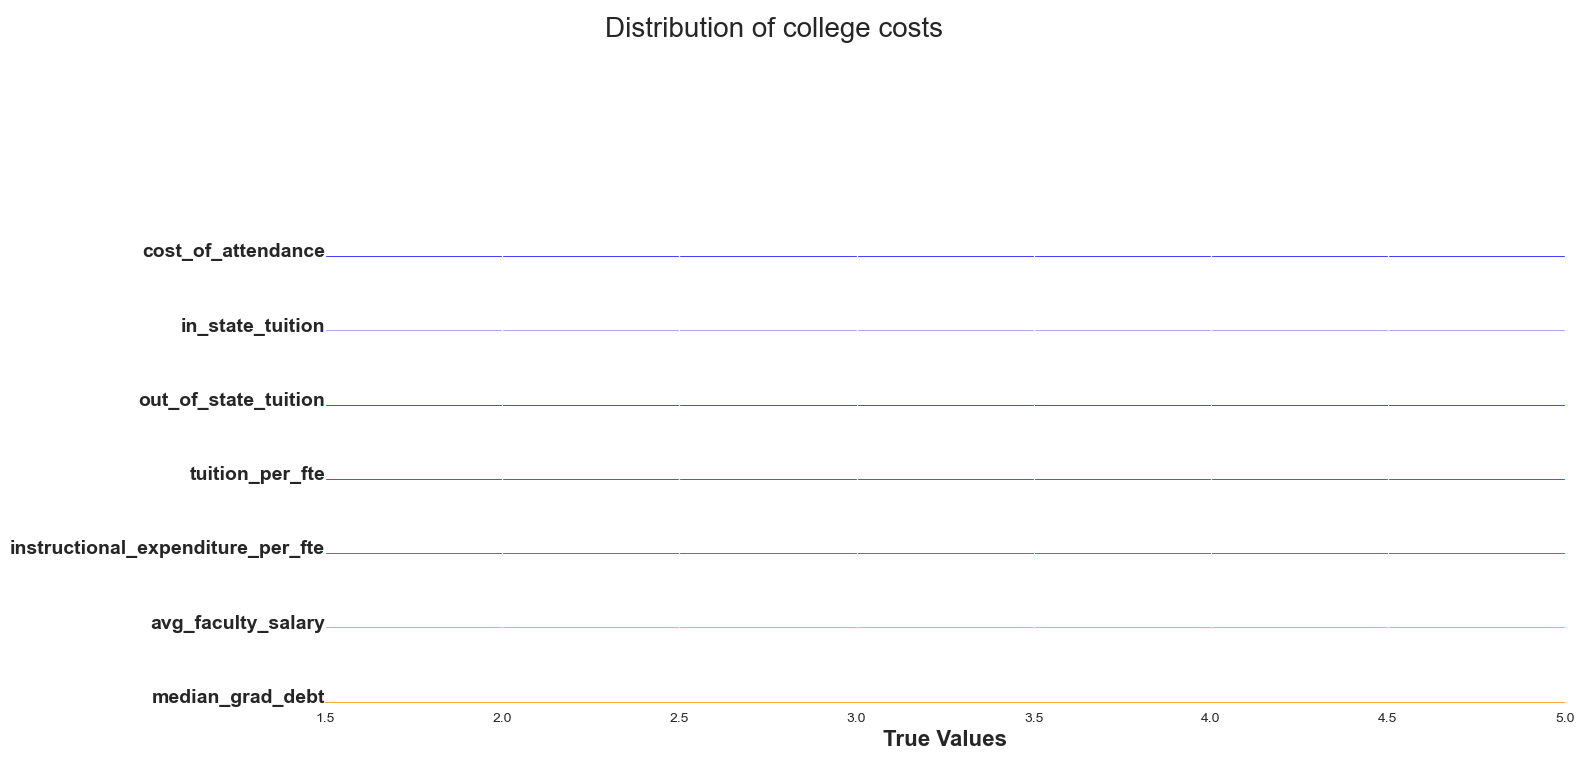

In [32]:
data_columns = [x for x in residuals_df.data_column.unique()]
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000', '#ff9900']

gs = grid_spec.GridSpec(len(data_columns),1)
fig = plt.figure(figsize=(16,9))

i = 0

ax_objs = []
for column in data_columns:
    country = data_columns[i]
    x = np.array(residuals_df[residuals_df.data_column == column].true_value)
    x_d = np.linspace(0, 5, 1000)

    kde = KernelDensity(bandwidth=0.06, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(1.5,5)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(data_columns)-1:
        ax_objs[-1].set_xlabel("True Values", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_column = column.replace(" ","\n")
    ax_objs[-1].text(1.5,0,adj_column,fontweight="bold",fontsize=14,ha="right")

    i += 1

gs.update(hspace=-0.7)

fig.text(0.3,0.85,"Distribution of college costs",fontsize=20)

plt.tight_layout()
plt.show()

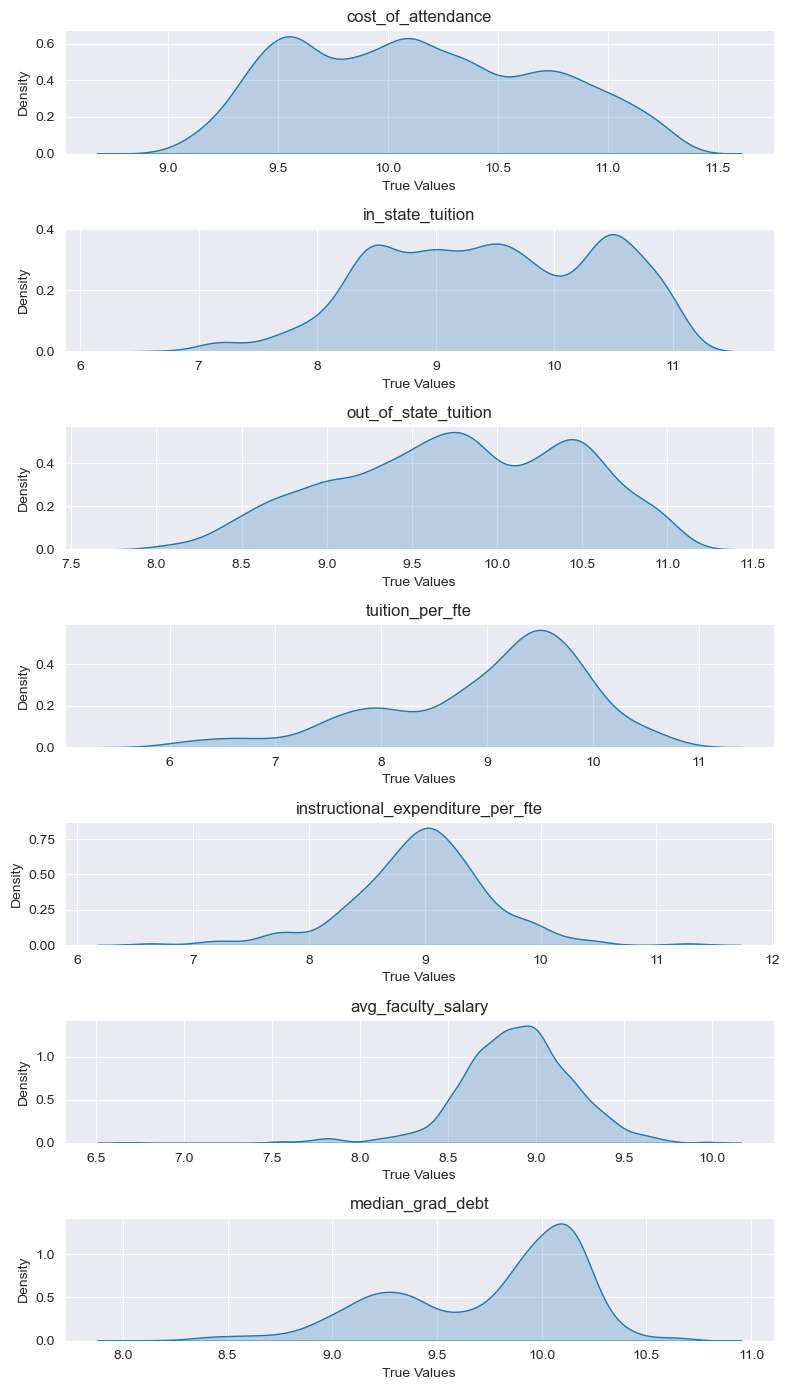

In [34]:
# Determine the number of rows and columns based on the length of columns_to_impute
num_rows = len(columns_to_impute)
num_cols = 1  # You can adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))

for i, col in enumerate(columns_to_impute):
    mask = residuals_df.query("data_column == @col")

    # Select the current axis
    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes  # If only one row, use a single axis

    # Plotting the KDE plot on the selected axis
    sns.kdeplot(data=mask, x="true_value", fill=True, label=col, ax=ax)

    ax.set_title(col)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

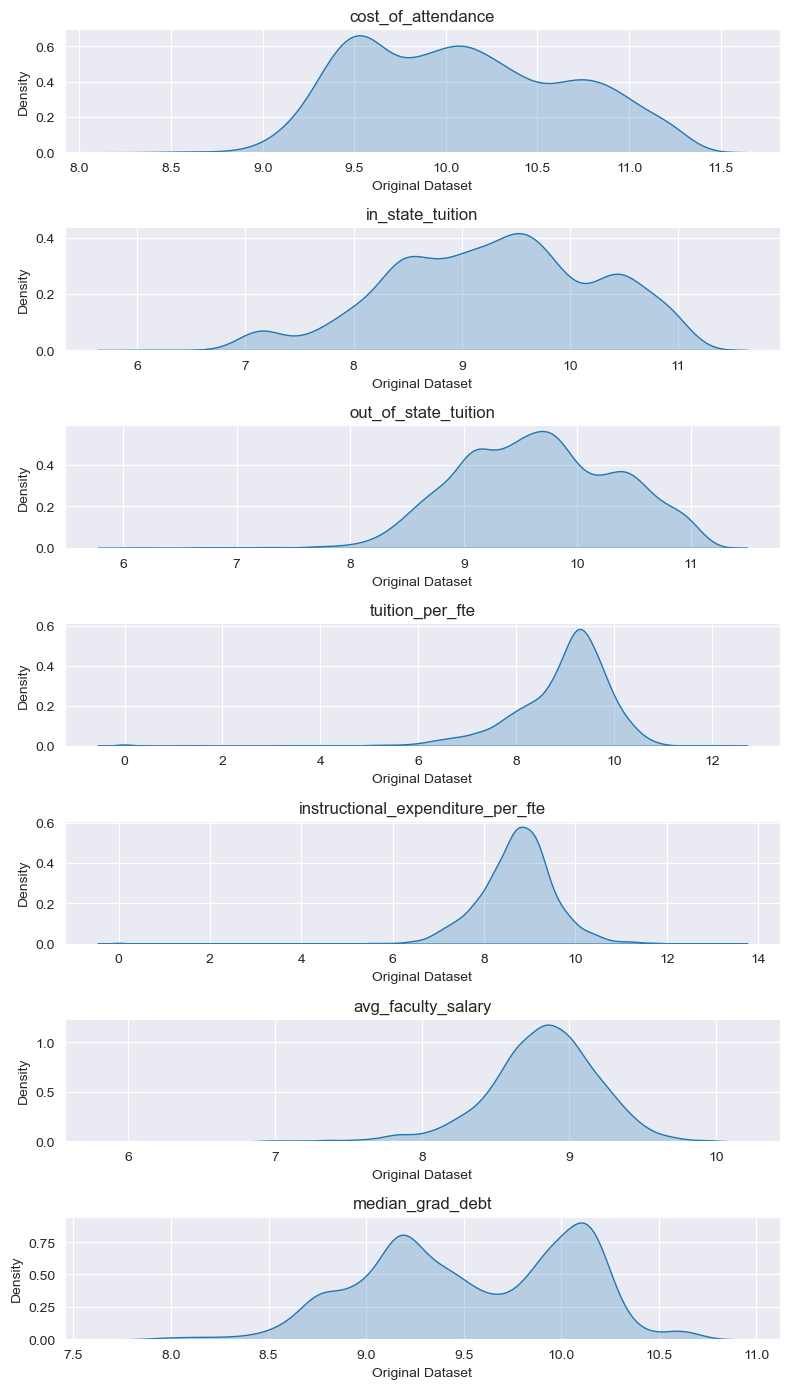

In [35]:
# Determine the number of rows and columns based on the length of columns_to_impute
num_rows = len(columns_to_impute)
num_cols = 1  # You can adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))

for i, col in enumerate(columns_to_impute):
    # mask = test_df.query("data_column == @col")

    # Select the current axis
    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes  # If only one row, use a single axis

    # Plotting the KDE plot on the selected axis
    sns.kdeplot(data=test_df, x=f"{col}", fill=True, label=col, ax=ax)

    ax.set_title(col)
    ax.set_xlabel('Original Dataset')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
test_df_clean.describe()

cost_of_attendance  in_state_tuition  out_of_state_tuition  \
count         2800.000000       2800.000000           2800.000000   
mean            10.146423          9.390937              9.772121   
std              0.566084          0.965284              0.688979   
min              8.968524          6.659294              6.659294   
25%              9.642869          8.616767              9.262696   
50%             10.108508          9.415727              9.773208   
75%             10.628781         10.263606             10.352531   
max             11.308739         11.060101             11.060101   

       tuition_per_fte  instructional_expenditure_per_fte  avg_faculty_salary  \
count      2800.000000                        2800.000000         2800.000000   
mean          8.950168                           8.947472            8.878763   
std           0.949078                           0.589993            0.334435   
min           0.000000                           6.481577            6.685861   
25%           8.304864                           8.617627            8.683809   
50%           9.151969                           8.958733            8.885787   
75%           9.650142                           9.272587            9.082621   
max          11.150908                          11.913947            9.985989   

       median_grad_debt  
count       2800.000000  
mean           9.728665  
std            0.462325  
min            7.944137  
25%            9.384105  
50%            9.902287  
75%           10.118881  
max           10.669444